In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import io, color, measure

In [88]:
def show_img(image, cmap="gray"):
    fig, ax = plt.subplots(figsize=(18,14))
    ax.imshow(image, cmap=cmap)
    return fig,ax

In [89]:
img_filename = "m001-002.jpg"

img = cv2.imread(img_filename,0)
# show_img(img, cmap="gray")

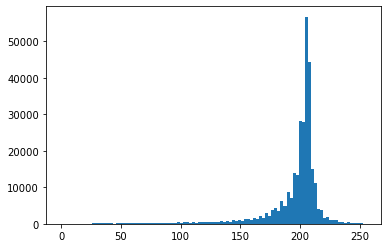

In [90]:
plt.hist(img.flat, bins=100, range=(0,255))
plt.show()

In [91]:
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh = cv2.threshold(blur, 197, 255, cv2.THRESH_BINARY_INV)
# ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# show_img(thresh)


In [92]:
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)
# show_img(eroded)

In [93]:
dilated = cv2.dilate(eroded, kernel, iterations=1)
# show_img(dilated)

In [94]:
labeled_mask, num_labels = ndimage.label(dilated)

(<Figure size 1296x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc417a0670>)

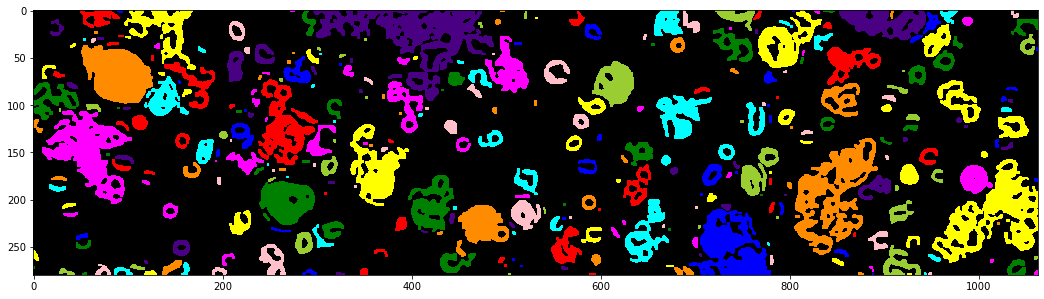

In [95]:
img2 = color.label2rgb(labeled_mask, bg_label=0)
show_img(img2)

In [96]:
clusters = measure.regionprops(labeled_mask, img)

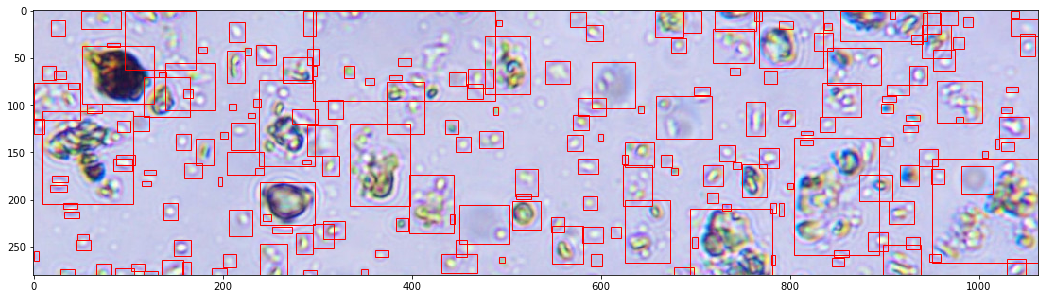

In [98]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(18,14))

img_color = cv2.imread(img_filename,1)
ax.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

for prop in clusters:
    #add rectangle to plot
    bbox = prop.bbox
    (y_min, x_min, y_max, x_max) = bbox
    if(prop.area > 30):
        ax.add_patch(Rectangle((x_min, y_min), (x_max - x_min), (y_max - y_min), fill=False, edgecolor="red"))

# display plot
plt.show()
